In [1]:
from fastai.vision import *
from pathlib import Path
import json
import os

In [2]:
path = Path('/home/jupyter/logo-detection/data/open_images/train/Person')

In [3]:
os.listdir(path/'Label')

['64cbe5f5a91635ad.txt',
 '4100fc651d88819b.txt',
 '3f19ee41aeb09479.txt',
 '14d05212f05652a2.txt',
 '0ac4704f4f511703.txt',
 'c33b36968829f087.txt',
 'f53d5e5d0c7a987a.txt',
 '70a6bcc5fdaf40f2.txt',
 '30cfcd04609eb477.txt',
 '311087178e15a65a.txt',
 '8f6973185f850ab3.txt',
 'fff7f7b69ac482cd.txt',
 '954769ffa3880230.txt',
 'f8bdbcd830ef72fe.txt',
 'd35775504642cb6d.txt',
 'e0f8163ce55a1b3b.txt',
 '6fce278e6e4eddb4.txt',
 'fd8c288589304137.txt',
 '31e30b31cdc696d3.txt',
 '9d684ea06efb1d38.txt',
 '36e3e31827b401a4.txt',
 'b390f73f15841f49.txt',
 '08205fed4c9f6679.txt',
 'aacba05dc738b01b.txt',
 '83ec6c5952777375.txt',
 'ac7c42fef259e725.txt',
 '29c3f721de0965b8.txt',
 'a7926262c44c44ca.txt',
 '3da70408dcd6b808.txt',
 '1b2109a4a5b64eee.txt',
 '1949da76c8147a8b.txt',
 '962043374dabf8ca.txt',
 'f5e006b3f3305810.txt',
 '46df3124439f53dc.txt',
 '8eea284c946928e9.txt',
 '00965bd22e9e33a2.txt',
 'b164d24be1bb546c.txt',
 '1cb6fa647f415b3b.txt',
 '985b3f79cac5f85b.txt',
 '5afe435874184c00.txt',


In [4]:
images = []
lbl_bbox = []

for file in os.listdir(path/'Label'):
    image = os.path.splitext(file)[0]+'.jpg'
    
    lbls = []
    classes = []
    
    with open(os.path.join(path/'Label', file)) as f:
        for line in f:
            obj = line.split()
            lbl = [float(v) for v in obj[1:]]
            lbl = [lbl[i] for i in [1,0,3,2]]
            cls = obj[0]
            
            lbls.append(lbl)
            classes.append(cls)
    
    images.append(image)
    lbl_bbox.append([lbls, classes])

In [5]:
lbl_bbox

[[[[138.88, 376.901659, 159.36, 403.137279]], ['Person']],
 [[[170.30004, 402.56, 553.155792, 572.16],
   [184.38549, 55.68, 297.06502199999994, 96.0],
   [194.628714, 84.48, 217.03661400000001, 103.68],
   [179.90391, 144.64, 380.934978, 204.8],
   [176.062362, 334.72, 449.43942, 417.28],
   [170.94074999999998, 375.68, 368.13026999999994, 442.24],
   [304.107408, 824.96, 430.232358, 902.4],
   [217.03661400000001, 880.64, 279.778734, 906.88],
   [219.59742, 895.36, 268.254768, 913.28],
   [211.91500200000002, 900.48, 239.444514, 915.84],
   [235.60364400000003, 922.88, 677.359968, 1023.36],
   [178.62316799999996, 954.24, 340.600758, 1023.36]],
  ['Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person']],
 [[[117.124096, 21.751808, 998.90176, 993.8821119999999]], ['Person']],
 [[[227.306403, 503.68, 343.200855, 576.0],
   [232.42871200000002, 887.04, 471.90069500000004, 952.32]],
  ['Perso

In [6]:
len(images), len(lbl_bbox)

(1000, 1000)

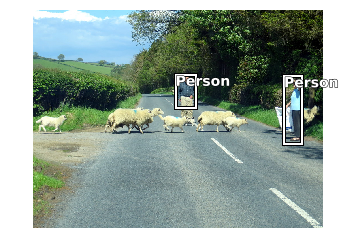

In [7]:
img = open_image(path/images[3])
bbox = ImageBBox.create(*img.size, lbl_bbox[3][0], [0, 1], classes=lbl_bbox[3][1])
img.show(figsize=(6,4), y=bbox)

In [8]:
img2bbox = dict(zip(images, lbl_bbox))

In [9]:
img2bbox

{'64cbe5f5a91635ad.jpg': [[[138.88, 376.901659, 159.36, 403.137279]],
  ['Person']],
 '4100fc651d88819b.jpg': [[[170.30004, 402.56, 553.155792, 572.16],
   [184.38549, 55.68, 297.06502199999994, 96.0],
   [194.628714, 84.48, 217.03661400000001, 103.68],
   [179.90391, 144.64, 380.934978, 204.8],
   [176.062362, 334.72, 449.43942, 417.28],
   [170.94074999999998, 375.68, 368.13026999999994, 442.24],
   [304.107408, 824.96, 430.232358, 902.4],
   [217.03661400000001, 880.64, 279.778734, 906.88],
   [219.59742, 895.36, 268.254768, 913.28],
   [211.91500200000002, 900.48, 239.444514, 915.84],
   [235.60364400000003, 922.88, 677.359968, 1023.36],
   [178.62316799999996, 954.24, 340.600758, 1023.36]],
  ['Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person',
   'Person']],
 '3f19ee41aeb09479.jpg': [[[117.124096,
    21.751808,
    998.90176,
    993.8821119999999]],
  ['Person']],
 '14d05212f05652a2.jpg': [[

In [10]:
img2bbox_df = pd.DataFrame(img2bbox).transpose()
img2bbox_df = img2bbox_df.reset_index()
img2bbox_df['label'] = img2bbox_df[[0, 1]].values.tolist()
img2bbox_df = img2bbox_df[['index', 'label']]

In [11]:
img2bbox_df.head()

,index,label
0,64cbe5f5a91635ad.jpg,"[[[138.88, 376.901659, 159.36, 403.137279]], [..."
1,4100fc651d88819b.jpg,"[[[170.30004, 402.56, 553.155792, 572.16], [18..."
2,3f19ee41aeb09479.jpg,"[[[117.124096, 21.751808, 998.90176, 993.88211..."
3,14d05212f05652a2.jpg,"[[[227.306403, 503.68, 343.200855, 576.0], [23..."
4,0ac4704f4f511703.jpg,"[[[412.872817, 0.0, 464.081425, 33.92], [566.4..."


In [12]:
def get_data(bs, size):
    src = ObjectItemList.from_df(img2bbox_df, path)
    src = src.split_by_rand_pct()
    src = src.label_from_df(cols='label')
    #src = src.add_test_folder(path_test/'JPEGImages', tfms=None)
    src = src.transform(get_transforms(do_flip=False), size=size, tfm_y=True)
    return src.databunch(path=path, bs=bs, collate_fn=bb_pad_collate)

In [13]:
data = get_data(64,128)

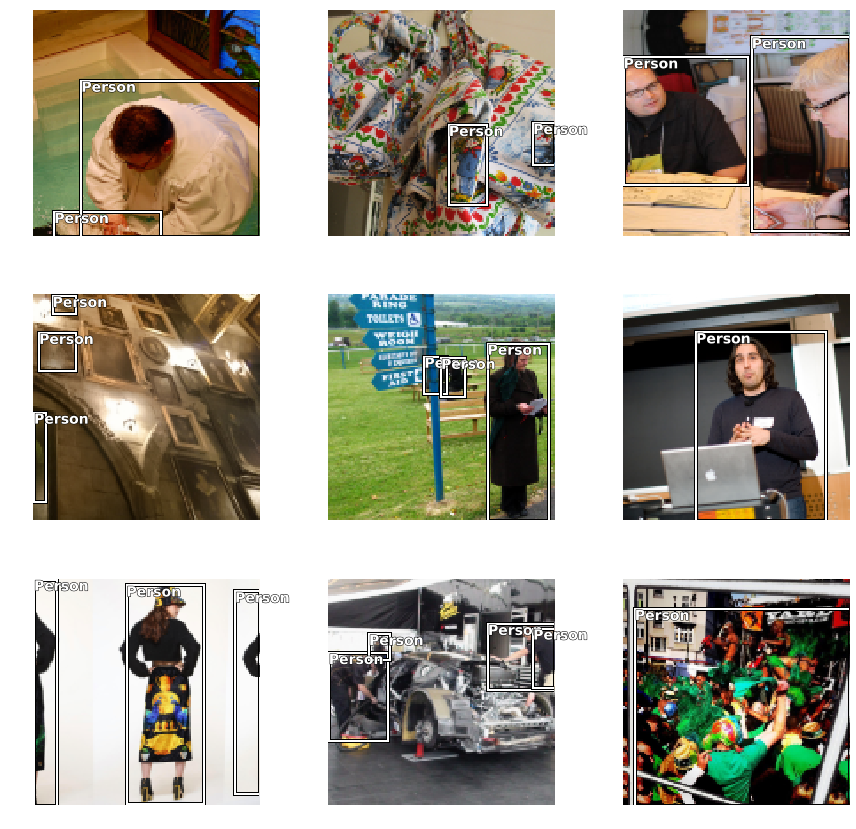

In [14]:
data.show_batch(rows=3)

In [15]:
#Grab the convenience functions that helps us build the Unet
from fastai.vision.models.unet import _get_sfs_idxs, model_sizes, hook_outputs

In [16]:
class LateralUpsampleMerge(nn.Module):
    "Merge the features coming from the downsample path (in `hook`) with the upsample path."
    def __init__(self, ch, ch_lat, hook):
        super().__init__()
        self.hook = hook
        self.conv_lat = conv2d(ch_lat, ch, ks=1, bias=True)
    
    def forward(self, x):
        return self.conv_lat(self.hook.stored) + F.interpolate(x, self.hook.stored.shape[-2:], mode='nearest')

In [17]:
class RetinaNet(nn.Module):
    "Implements RetinaNet from https://arxiv.org/abs/1708.02002"
    def __init__(self, encoder:nn.Module, n_classes, final_bias=0., chs=256, n_anchors=9, flatten=True):
        super().__init__()
        self.n_classes,self.flatten = n_classes,flatten
        imsize = (256,256)
        sfs_szs = model_sizes(encoder, size=imsize)
        sfs_idxs = list(reversed(_get_sfs_idxs(sfs_szs)))
        self.sfs = hook_outputs([encoder[i] for i in sfs_idxs])
        self.encoder = encoder
        self.c5top5 = conv2d(sfs_szs[-1][1], chs, ks=1, bias=True)
        self.c5top6 = conv2d(sfs_szs[-1][1], chs, stride=2, bias=True)
        self.p6top7 = nn.Sequential(nn.ReLU(), conv2d(chs, chs, stride=2, bias=True))
        self.merges = nn.ModuleList([LateralUpsampleMerge(chs, sfs_szs[idx][1], hook) 
                                     for idx,hook in zip(sfs_idxs[-2:-4:-1], self.sfs[-2:-4:-1])])
        self.smoothers = nn.ModuleList([conv2d(chs, chs, 3, bias=True) for _ in range(3)])
        self.classifier = self._head_subnet(n_classes, n_anchors, final_bias, chs=chs)
        self.box_regressor = self._head_subnet(4, n_anchors, 0., chs=chs)
        
    def _head_subnet(self, n_classes, n_anchors, final_bias=0., n_conv=4, chs=256):
        "Helper function to create one of the subnet for regression/classification."
        layers = [conv_layer(chs, chs, bias=True, norm_type=None) for _ in range(n_conv)]
        layers += [conv2d(chs, n_classes * n_anchors, bias=True)]
        layers[-1].bias.data.zero_().add_(final_bias)
        layers[-1].weight.data.fill_(0)
        return nn.Sequential(*layers)
    
    def _apply_transpose(self, func, p_states, n_classes):
        #Final result of the classifier/regressor is bs * (k * n_anchors) * h * w
        #We make it bs * h * w * n_anchors * k then flatten in bs * -1 * k so we can contenate
        #all the results in bs * anchors * k (the non flatten version is there for debugging only)
        if not self.flatten: 
            sizes = [[p.size(0), p.size(2), p.size(3)] for p in p_states]
            return [func(p).permute(0,2,3,1).view(*sz,-1,n_classes) for p,sz in zip(p_states,sizes)]
        else:
            return torch.cat([func(p).permute(0,2,3,1).contiguous().view(p.size(0),-1,n_classes) for p in p_states],1)
    
    def forward(self, x):
        c5 = self.encoder(x)
        p_states = [self.c5top5(c5.clone()), self.c5top6(c5)]
        p_states.append(self.p6top7(p_states[-1]))
        for merge in self.merges: p_states = [merge(p_states[0])] + p_states
        for i, smooth in enumerate(self.smoothers[:3]):
            p_states[i] = smooth(p_states[i])
        return [self._apply_transpose(self.classifier, p_states, self.n_classes), 
                self._apply_transpose(self.box_regressor, p_states, 4),
                [[p.size(2), p.size(3)] for p in p_states]]
    
    def __del__(self):
        if hasattr(self, "sfs"): self.sfs.remove()

In [18]:
def create_grid(size):
    "Create a grid of a given `size`."
    H, W = size if is_tuple(size) else (size,size)
    grid = FloatTensor(H, W, 2)
    linear_points = torch.linspace(-1+1/W, 1-1/W, W) if W > 1 else tensor([0.])
    grid[:, :, 1] = torch.ger(torch.ones(H), linear_points).expand_as(grid[:, :, 0])
    linear_points = torch.linspace(-1+1/H, 1-1/H, H) if H > 1 else tensor([0.])
    grid[:, :, 0] = torch.ger(linear_points, torch.ones(W)).expand_as(grid[:, :, 1])
    return grid.view(-1,2)

In [19]:
def create_anchors(sizes, ratios, scales, flatten=True):
    "Create anchor of `sizes`, `ratios` and `scales`."
    aspects = [[[s*math.sqrt(r), s*math.sqrt(1/r)] for s in scales] for r in ratios]
    aspects = torch.tensor(aspects).view(-1,2)
    anchors = []
    for h,w in sizes:
        #4 here to have the anchors overlap.
        sized_aspects = 4 * (aspects * torch.tensor([2/h,2/w])).unsqueeze(0)
        base_grid = create_grid((h,w)).unsqueeze(1)
        n,a = base_grid.size(0),aspects.size(0)
        ancs = torch.cat([base_grid.expand(n,a,2), sized_aspects.expand(n,a,2)], 2)
        anchors.append(ancs.view(h,w,a,4))
    return torch.cat([anc.view(-1,4) for anc in anchors],0) if flatten else anchors

In [20]:
def activ_to_bbox(acts, anchors, flatten=True):
    "Extrapolate bounding boxes on anchors from the model activations."
    if flatten:
        acts.mul_(acts.new_tensor([[0.1, 0.1, 0.2, 0.2]])) #Can't remember where those scales come from, but they help regularize
        centers = anchors[...,2:] * acts[...,:2] + anchors[...,:2]
        sizes = anchors[...,2:] * torch.exp(acts[...,:2])
        return torch.cat([centers, sizes], -1)
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

In [21]:
def cthw2tlbr(boxes):
    "Convert center/size format `boxes` to top/left bottom/right corners."
    top_left = boxes[:,:2] - boxes[:,2:]/2
    bot_right = boxes[:,:2] + boxes[:,2:]/2
    return torch.cat([top_left, bot_right], 1)

In [22]:
def intersection(anchors, targets):
    "Compute the sizes of the intersections of `anchors` by `targets`."
    ancs, tgts = cthw2tlbr(anchors), cthw2tlbr(targets)
    a, t = ancs.size(0), tgts.size(0)
    ancs, tgts = ancs.unsqueeze(1).expand(a,t,4), tgts.unsqueeze(0).expand(a,t,4)
    top_left_i = torch.max(ancs[...,:2], tgts[...,:2])
    bot_right_i = torch.min(ancs[...,2:], tgts[...,2:])
    sizes = torch.clamp(bot_right_i - top_left_i, min=0) 
    return sizes[...,0] * sizes[...,1]

In [23]:
def IoU_values(anchors, targets):
    "Compute the IoU values of `anchors` by `targets`."
    inter = intersection(anchors, targets)
    anc_sz, tgt_sz = anchors[:,2] * anchors[:,3], targets[:,2] * targets[:,3]
    union = anc_sz.unsqueeze(1) + tgt_sz.unsqueeze(0) - inter
    return inter/(union+1e-8)

In [24]:
def match_anchors(anchors, targets, match_thr=0.5, bkg_thr=0.4):
    "Match `anchors` to targets. -1 is match to background, -2 is ignore."
    matches = anchors.new(anchors.size(0)).zero_().long() - 2
    if targets.numel() == 0: return matches
    ious = IoU_values(anchors, targets)
    vals,idxs = torch.max(ious,1)
    matches[vals < bkg_thr] = -1
    matches[vals > match_thr] = idxs[vals > match_thr]
    #Overwrite matches with each target getting the anchor that has the max IoU.
    #vals,idxs = torch.max(ious,0)
    #If idxs contains repetition, this doesn't bug and only the last is considered.
    #matches[idxs] = targets.new_tensor(list(range(targets.size(0)))).long()
    return matches

In [25]:
def tlbr2cthw(boxes):
    "Convert top/left bottom/right format `boxes` to center/size corners."
    center = (boxes[:,:2] + boxes[:,2:])/2
    sizes = boxes[:,2:] - boxes[:,:2]
    return torch.cat([center, sizes], 1)

In [26]:
def bbox_to_activ(bboxes, anchors, flatten=True):
    "Return the target of the model on `anchors` for the `bboxes`."
    if flatten:
        t_centers = (bboxes[...,:2] - anchors[...,:2]) / anchors[...,2:] 
        t_sizes = torch.log(bboxes[...,2:] / anchors[...,2:] + 1e-8) 
        return torch.cat([t_centers, t_sizes], -1).div_(bboxes.new_tensor([[0.1, 0.1, 0.2, 0.2]]))
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

In [27]:
def encode_class(idxs, n_classes):
    target = idxs.new_zeros(len(idxs), n_classes).float()
    mask = idxs != 0
    i1s = LongTensor(list(range(len(idxs))))
    target[i1s[mask],idxs[mask]-1] = 1
    return target

In [28]:
class RetinaNetFocalLoss(nn.Module):
    
    def __init__(self, gamma:float=2., alpha:float=0.25,  pad_idx:int=0, scales:Collection[float]=None, 
                 ratios:Collection[float]=None, reg_loss:LossFunction=F.smooth_l1_loss):
        super().__init__()
        self.gamma,self.alpha,self.pad_idx,self.reg_loss = gamma,alpha,pad_idx,reg_loss
        self.scales = ifnone(scales, [1,2**(-1/3), 2**(-2/3)])
        self.ratios = ifnone(ratios, [1/2,1,2])
        
    def _change_anchors(self, sizes:Sizes) -> bool:
        if not hasattr(self, 'sizes'): return True
        for sz1, sz2 in zip(self.sizes, sizes):
            if sz1[0] != sz2[0] or sz1[1] != sz2[1]: return True
        return False
    
    def _create_anchors(self, sizes:Sizes, device:torch.device):
        self.sizes = sizes
        self.anchors = create_anchors(sizes, self.ratios, self.scales).to(device)
    
    def _unpad(self, bbox_tgt, clas_tgt):
        i = torch.min(torch.nonzero(clas_tgt-self.pad_idx))
        return tlbr2cthw(bbox_tgt[i:]), clas_tgt[i:]-1+self.pad_idx
    
    def _focal_loss(self, clas_pred, clas_tgt):
        encoded_tgt = encode_class(clas_tgt, clas_pred.size(1))
        ps = torch.sigmoid(clas_pred.detach())
        weights = encoded_tgt * (1-ps) + (1-encoded_tgt) * ps
        alphas = (1-encoded_tgt) * self.alpha + encoded_tgt * (1-self.alpha)
        weights.pow_(self.gamma).mul_(alphas)
        clas_loss = F.binary_cross_entropy_with_logits(clas_pred, encoded_tgt, weights, reduction='sum')
        return clas_loss
        
    def _one_loss(self, clas_pred, bbox_pred, clas_tgt, bbox_tgt):
        bbox_tgt, clas_tgt = self._unpad(bbox_tgt, clas_tgt)
        matches = match_anchors(self.anchors, bbox_tgt)
        bbox_mask = matches>=0
        if bbox_mask.sum() != 0:
            bbox_pred = bbox_pred[bbox_mask]
            bbox_tgt = bbox_tgt[matches[bbox_mask]]
            bb_loss = self.reg_loss(bbox_pred, bbox_to_activ(bbox_tgt, self.anchors[bbox_mask]))
        else: bb_loss = 0.
        matches.add_(1)
        clas_tgt = clas_tgt + 1
        clas_mask = matches>=0
        clas_pred = clas_pred[clas_mask]
        clas_tgt = torch.cat([clas_tgt.new_zeros(1).long(), clas_tgt])
        clas_tgt = clas_tgt[matches[clas_mask]]
        return bb_loss + self._focal_loss(clas_pred, clas_tgt)/torch.clamp(bbox_mask.sum(), min=1.)
    
    def forward(self, output, bbox_tgts, clas_tgts):
        clas_preds, bbox_preds, sizes = output
        if self._change_anchors(sizes): self._create_anchors(sizes, clas_preds.device)
        n_classes = clas_preds.size(2)
        return sum([self._one_loss(cp, bp, ct, bt)
                    for (cp, bp, ct, bt) in zip(clas_preds, bbox_preds, clas_tgts, bbox_tgts)])/clas_tgts.size(0)

In [29]:
class SigmaL1SmoothLoss(nn.Module):

    def forward(self, output, target):
        reg_diff = torch.abs(target - output)
        reg_loss = torch.where(torch.le(reg_diff, 1/9), 4.5 * torch.pow(reg_diff, 2), reg_diff - 1/18)
        return reg_loss.mean()

In [30]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)]
#scales = [1,2**(1/3), 2**(2/3)] for bigger size

In [31]:
encoder = create_body(models.resnet50, cut=-2)
model = RetinaNet(encoder, data.c, final_bias=-4)
crit = RetinaNetFocalLoss(scales=scales, ratios=ratios)
learn = Learner(data, model, loss_func=crit)

In [32]:
learn.model

RetinaNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, ker

In [33]:
def retina_net_split(model):
    groups = [list(model.encoder.children())[:6], list(model.encoder.children())[6:]]
    return groups + [list(model.children())[1:]]

In [34]:
learn = learn.split(retina_net_split)

In [35]:
learn.freeze()

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


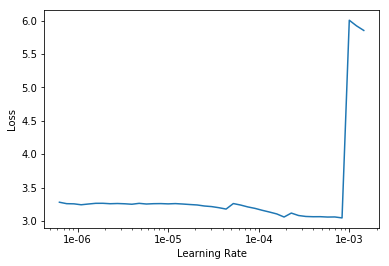

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,time
0,3.183258,3.009790,00:17
1,2.889132,2.224247,00:16
2,2.498695,1.786749,00:16
3,2.249488,1.837231,00:16
4,2.074639,1.827532,00:16
5,1.931401,1.992352,00:16
6,1.832343,1.749157,00:16
7,1.746916,1.940531,00:16
8,1.698916,1.860942,00:16
9,1.640403,1.786633,00:16


In [39]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(20, slice(1e-6, 5e-5))

epoch,train_loss,valid_loss,time
0,1.474717,1.854625,00:18
1,1.473879,1.904499,00:17
2,1.470472,1.821416,00:17
3,1.459129,1.689920,00:17
4,1.441292,1.945194,00:17
5,1.417497,1.989107,00:17
6,1.406655,1.957236,00:17
7,1.382179,1.559534,00:17
8,1.374880,1.630586,00:17
9,1.348328,1.507050,00:17


In [41]:
def unpad(tgt_bbox, tgt_clas, pad_idx=0):
    i = torch.min(torch.nonzero(tgt_clas-pad_idx))
    return tlbr2cthw(tgt_bbox[i:]), tgt_clas[i:]-1+pad_idx

In [42]:
def _draw_outline(o:Patch, lw:int):
    "Outline bounding box onto image `Patch`."
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax:plt.Axes, b:Collection[int], color:str='white', text=None, text_size=14):
    "Draw bounding box on `ax`."
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    _draw_outline(patch, 4)
    if text is not None:
        patch = ax.text(*b[:2], text, verticalalignment='top', color=color, fontsize=text_size, weight='bold')
        _draw_outline(patch,1)

In [48]:
def nms(boxes, scores, thresh=0.3):
    idx_sort = scores.argsort(descending=True)
    boxes, scores = boxes[idx_sort], scores[idx_sort]
    to_keep, indexes = [], torch.LongTensor(range_of(scores))
    while len(scores) > 0:
        to_keep.append(idx_sort[indexes[0]])
        iou_vals = IoU_values(boxes, boxes[:1]).squeeze()
        mask_keep = iou_vals < thresh
        if len(mask_keep.nonzero()) == 0: break
        boxes, scores, indexes = boxes[mask_keep], scores[mask_keep], indexes[mask_keep]
    return LongTensor(to_keep)

In [43]:
def process_output(output, i, detect_thresh=0.25):
    clas_pred,bbox_pred,sizes = output[0][i], output[1][i], output[2]
    anchors = create_anchors(sizes, ratios, scales).to(clas_pred.device)
    bbox_pred = activ_to_bbox(bbox_pred, anchors)
    clas_pred = torch.sigmoid(clas_pred)
    detect_mask = clas_pred.max(1)[0] > detect_thresh
    bbox_pred, clas_pred = bbox_pred[detect_mask], clas_pred[detect_mask]
    bbox_pred = tlbr2cthw(torch.clamp(cthw2tlbr(bbox_pred), min=-1, max=1))    
    if clas_pred.numel() == 0: return [],[],[]
    scores, preds = clas_pred.max(1)
    return bbox_pred, scores, preds

In [44]:
def show_preds(img, output, idx, detect_thresh=0.25, classes=None, ax=None):
    bbox_pred, scores, preds = process_output(output, idx, detect_thresh)
    if len(scores) != 0:
        to_keep = nms(bbox_pred, scores)
        bbox_pred, preds, scores = bbox_pred[to_keep].cpu(), preds[to_keep].cpu(), scores[to_keep].cpu()
        t_sz = torch.Tensor([*img.size])[None].float()
        bbox_pred[:,:2] = bbox_pred[:,:2] - bbox_pred[:,2:]/2
        bbox_pred[:,:2] = (bbox_pred[:,:2] + 1) * t_sz/2
        bbox_pred[:,2:] = bbox_pred[:,2:] * t_sz/2
        bbox_pred = bbox_pred.long()
    if ax is None: _, ax = plt.subplots(1,1)
    img.show(ax=ax)
    for bbox, c, scr in zip(bbox_pred, preds, scores):
        txt = str(c.item()) if classes is None else classes[c.item()+1]
        draw_rect(ax, [bbox[1],bbox[0],bbox[3],bbox[2]], text=f'{txt} {scr:.2f}')

In [45]:
from itertools import islice

In [46]:
def show_results(learn, start=0, n=5, detect_thresh=0.35, figsize=(10,25)):
    x,y = learn.data.one_batch(DatasetType.Valid, cpu=False)
    with torch.no_grad():
        z = learn.model.eval()(x)
    _,axs = plt.subplots(n, 2, figsize=figsize)
    for i in range(n):
        img,bbox = learn.data.valid_ds[start+i]
        img.show(ax=axs[i,0], y=bbox)
        show_preds(img, z, start+i, detect_thresh=detect_thresh, classes=learn.data.classes, ax=axs[i,1])

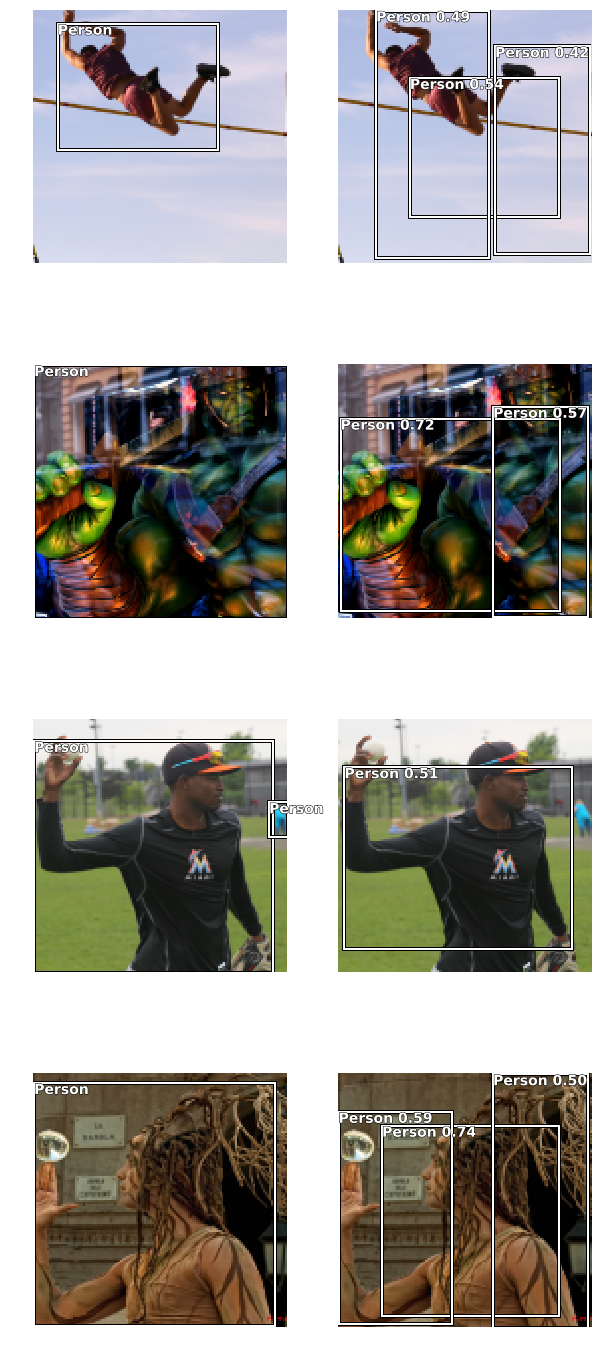

In [49]:
show_results(learn, n=4, detect_thresh=0.4)